<a href="https://www.kaggle.com/code/maksiamiogan/yolov8-approx?scriptVersionId=164743567" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from scipy.optimize import curve_fit #This will do the actual curve fitting
import numpy as np
import matplotlib.pyplot as plt

x = np.array([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 229])
y_true_raw = {0: [0.00020721092496759136, 0.0003607266074337864, 0.00027005284958320615], 1: [0.0006648566465348611, 0.0010445458639145515, 0.0007585742044491664], 2: [0.0001533349030211108, 0.00027072691455373927, 0.0001801570395266332], 3: [0.00027021438620086237, 0.000450841655312457, 0.0003600160555773973], 4: [0.0002335054331843018, 0.0004495928178598895, 0.00026877440420527895], 5: [0.00015316922600649364, 0.00027036402311594144, 0.00017996160541670458], 6: [0.00023324697011095895, 0.00044933771787726307, 0.00026862151894620727], 7: [0.012960079264115909, 0.02104875828510579, 0.013572577613718769], 8: [0.014121682070892514, 0.023477109739826987, 0.014651547565511031], 9: [0.014958358041101924, 0.025665096211008466, 0.01569378092272453], 10: [0.016327033037585002, 0.028596198578925248, 0.016570861682855133], 11: [0.01675549833683372, 0.02958491226602173, 0.016764683960282772], 12: [0.35091312258126944, 0.6905226730350382, 0.29622236592883555], 13: [0.3525808341034157, 0.6857229385328576, 0.30501096660393145], 14: [0.330803546560301, 0.6802207228938194, 0.24937270688974333], 15: [0.38985400164938483, 0.7525985236719652, 0.3396329205901808], 16: [0.38962229839486495, 0.8256977993431736, 0.28509147415252994], 17: [0.3983079217702564, 0.8152377580190577, 0.3121227174503037], 18: [0.4007808855791066, 0.8018840249172612, 0.3369305908406248], 19: [0.4305037642405013, 0.8722943930879609, 0.3583880935697834], 20: [0.43612085571525955, 0.8549373555795025, 0.392563273124143], 21: [0.438761161689101, 0.8482919994461766, 0.40869652667906664], 22: [0.4539041961029685, 0.8989274526104106, 0.397224238367864], 23: [0.4583704508251333, 0.8846934637126755, 0.4102658526093848], 24: [0.4568196161978707, 0.8821434426494518, 0.4019173161709252], 25: [0.46235447763896387, 0.8739986865134758, 0.4206104679873258], 26: [0.4665424086444724, 0.8691084987013799, 0.43437658667785106], 27: [0.4513467281660987, 0.9244976224472686, 0.3664948719821409], 28: [0.49149550354571475, 0.9347401100895778, 0.4341245412651403], 29: [0.4637383295990608, 0.9429513242063092, 0.3876416367060902], 30: [0.5281536670141751, 0.9476485667279009, 0.5217564007459367], 31: [0.47720838776597524, 0.9328565470874729, 0.4206494814240386], 32: [0.5101288404471862, 0.9441994761561041, 0.47244178262055614], 33: [0.5246384377824964, 0.9570022244808197, 0.5101266480647234], 34: [0.5168351235928226, 0.9496816472131422, 0.5022574994630407], 35: [0.49471561555621213, 0.9377367420489983, 0.4679790412078065], 36: [0.5632960670777474, 0.9679374789816764, 0.5808369654119652]}
y_true = [y_true_raw[item][0] for item in y_true_raw.keys()]

def log4pl(x, A, B, C, D):
    return(((A-D)/(1.0+((x/C)**B))) + D)

params, _ = curve_fit(log4pl, x, y_true, maxfev=5000) #curve fit
A,B,C,D = params[0], params[1], params[2], params[3] #get the parameters
print("4PL parameters: A = " + str(round(A,4)) + ", B = " + str(round(B,4)) + ", C = " + str(round(C,4)) + ", D = " + str(round(D,4))) #print the paramters


4PL parameters: A = -0.0102, B = 5.2411, C = 37.4078, D = 0.4776


/tmp/ipykernel_19/3987815751.py:10: RuntimeWarning: invalid value encountered in power
  return(((A-D)/(1.0+((x/C)**B))) + D)


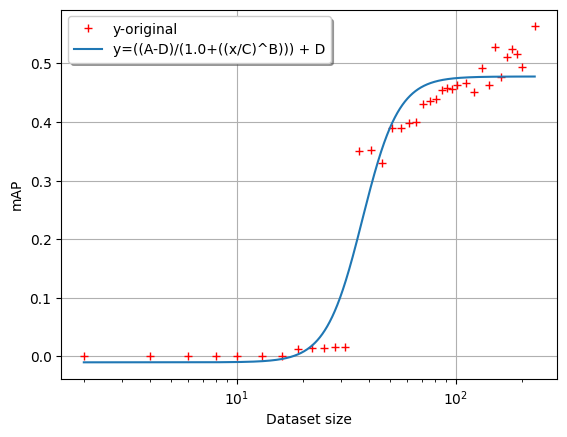

In [2]:
x_min = min(x)
x_max = max(x)
step = 0.01
x_new = np.arange(x_min, x_max, step)
yfit1_new = ((A-D)/(1.0+((x_new/C)**B))) + D
plt.plot(x, y_true, 'r+', label="y-original")
plt.plot(x_new, yfit1_new, label="y=((A-D)/(1.0+((x/C)^B))) + D")
plt.xlabel('Dataset size')
plt.ylabel('mAP')
plt.xscale("log")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 